In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
dictionary_file_location = "words_250000_train.txt"

def build_dictionary(dictionary_file_location):
    text_file = open(dictionary_file_location,"r")
    full_dictionary = text_file.read().splitlines()
    text_file.close()
    return full_dictionary

data=word_dic=build_dictionary(dictionary_file_location)

In [111]:
df=pd.DataFrame(data,columns=['Word'])
df.head()

,Word
0,aaa
1,aaaaaa
2,aaas
3,aachen
4,aaee


In [112]:
len(df['Word'].values) == df['Word'].nunique()

True

# Frequency Of Letters

<AxesSubplot:xlabel='Letter', ylabel='Value'>

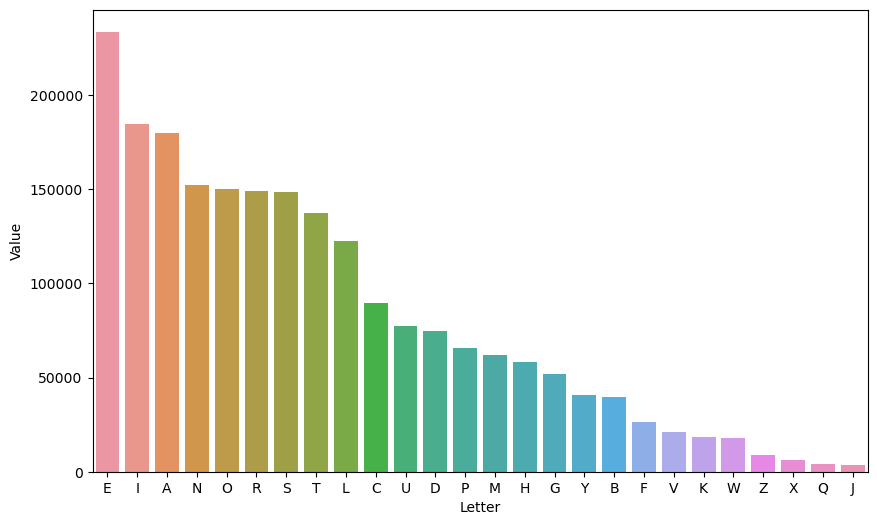

In [113]:
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
def get_letter_count(data):
    letterCount = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0,
                   'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0,
                   'Y': 0, 'Z': 0}
    for word in data:
        for letter in word.upper():
            if letter in LETTERS:
                letterCount[letter] += 1
    return letterCount

lf = pd.DataFrame(list(get_letter_count(data).items()),columns=['Letter','Value'])
sorted_lf=lf.sort_values(by='Value',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Letter', y = 'Value', data=sorted_lf)

# Length of Words

In [114]:
df['Word Length']=df['Word'].apply(lambda word : len(word))
df.sort_values(by='Word Length',inplace=True)

<AxesSubplot:xlabel='Word Length', ylabel='Word Count'>

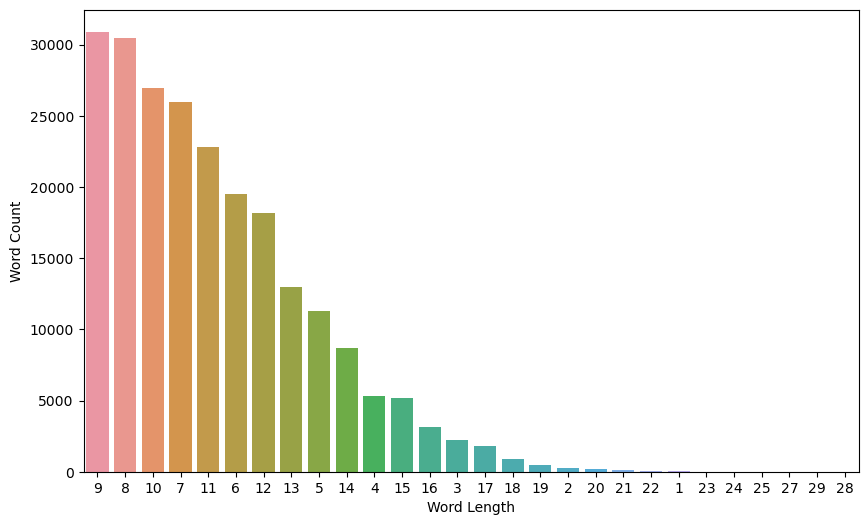

In [115]:
unique_lengths = df['Word Length'].unique()
word_counts = [len(df[df['Word Length'] == length]['Word'].values) for length in unique_lengths]
wc=pd.DataFrame(data=[unique_lengths,word_counts], index=['Word Length', 'Word Count']).T
sorted_wc = wc.groupby('Word Length').sum().reset_index().sort_values('Word Count',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Word Length', y='Word Count', data = wc, order = sorted_wc['Word Length'])

# Popularity of letter for different word lengths

In [116]:
letter_counts = {}

for index, row in df.iterrows():
    word = row['Word']
    length = row['Word Length']
    
    letter_count = {}
    for letter in word.upper():
        letter_count[letter] = letter_count.get(letter, 0) + 1
    
    if length in letter_counts:
        for letter, count in letter_count.items():
            letter_counts[length][letter] = letter_counts[length].get(letter, 0) + count
    else:
        letter_counts[length] = letter_count

sorted_letter_counts = {k: letter_counts[k] for k in sorted(letter_counts)}
supersorted_letter_counts = {key: dict(sorted(inner_dict.items(), key=lambda item: item[1], reverse = True)) for key, inner_dict
                             in sorted_letter_counts.items()}
flat_list = []

for length, letters_counts in supersorted_letter_counts.items():
    for letter, count in letters_counts.items():
        flat_list.append((length, letter, count))

df = pd.DataFrame(flat_list, columns=['Word Length', 'Letter', 'Count'])

In [146]:
#Function that takes length of the word and gives a bar chart showing the most popular to the least popular word
def letter_popularity(len_word):
    return sns.barplot(x='Letter', y = 'Count', data = df[df['Word Length'] == len_word])

<AxesSubplot:xlabel='Letter', ylabel='Count'>

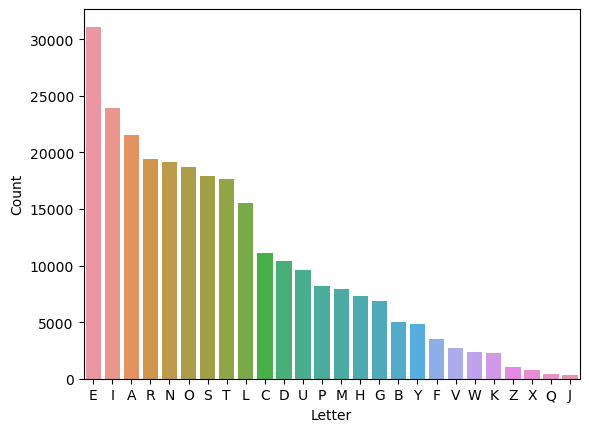

In [147]:
letter_popularity(10)